In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import os
import sys
from glob import glob

In [155]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.autolayout'] = True
mpl.rcParams['image.aspect']='auto'
mpl.rcParams['xtick.labelsize']=20
mpl.rcParams['ytick.labelsize']=20
#mpl.rcParams['grid.grid'] = True
#mpl.rcParams['axes.grid'] = 'White'

In [144]:
def offset_time_array(time_array,time_array_name):
    globals()[time_array_name+'_offset'] = time_array - time_array.min()

In [ ]:
def process_sa_rfi_csv(mypath,filename,descriptor):
    globals()["df_file_" + descriptor] = pd.read_csv(mypath+filename,header=None)
    globals()["df_file_" + descriptor].pop(globals()["df_file_" + descriptor].columns[0])
    globals()["time_array_" + descriptor] = globals()["df_file_" + descriptor][globals()["df_file_" + descriptor].columns[0]].to_numpy()
    globals()["df_file_" + descriptor].pop(globals()["df_file_" + descriptor].columns[0])
    globals()["data_file_" + descriptor] = globals()["df_file_" + descriptor].to_numpy()

In [165]:
def freq_to_index(freq,value):
    idx = (np.abs(freq-value)).argmin()
    return idx

In [48]:
# Spectrum_Analyzer_setting
SA_settings = {'f_start': 500e6, 'f_stop': 6500e6, 'N_points': 1001, 'res_bw' : 300e3, 'video_bw' : 1.5e6}

In [52]:
freq = np.linspace(SA_settings['f_start'],SA_settings['f_stop'],SA_settings['N_points'])
print(freq[0],freq[1],freq[-1])
print(np.size(freq))

500000000.0 506000000.0 6500000000.0
1001


In [11]:
base_path = '/Users/mayuris/workspace/RRI_DISTORTION/APSERa/Data/GBD_RFI'

In [34]:
my_path = os.path.join(base_path, "20230324_RFI/")
#os.path.exists(my_path)

True

In [130]:
#header_field_zenith_230323 = "2023-03-24_122923_hdr"
#header_terrace_east_230323 = "2023-03-24_195117_hdr"
filename = "2023-03-24_122923.csv"
descriptor = "field_zenith_230323"
process_sa_rfi_csv(my_path,filename,descriptor)

filename = "2023-03-24_195117.csv"
descriptor = "terrace_east_230323"
process_sa_rfi_csv(my_path,filename,descriptor)

filename = "2023-03-24_212300.csv"
descriptor = "terrace_south_230323"
process_sa_rfi_csv(my_path,filename,descriptor)

In [145]:
offset_time_array(time_array_field_zenith_230323,"time_array_field_zenith_230323")
offset_time_array(time_array_terrace_east_230323,"time_array_terrace_east_230323")
offset_time_array(time_array_terrace_south_230323,"time_array_terrace_south_230323")

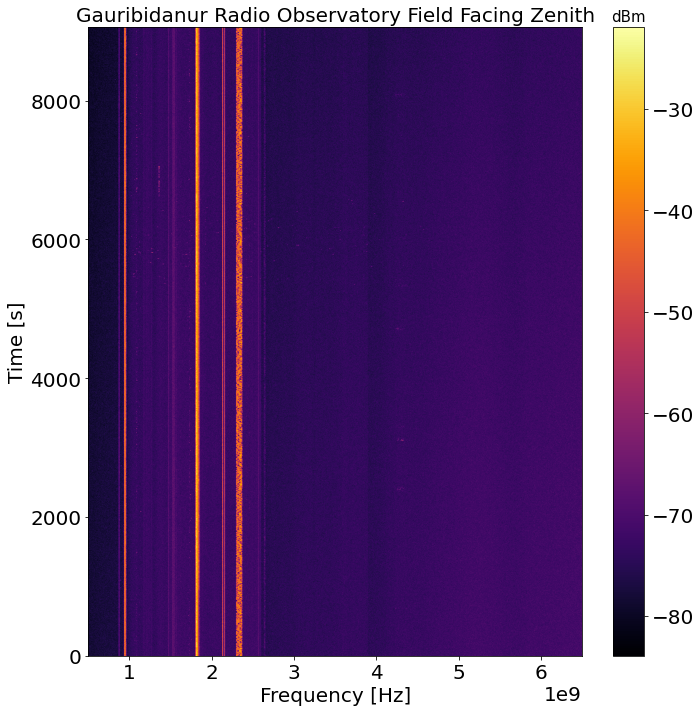

In [159]:
plt.title('Gauribidanur Radio Observatory Field Facing Zenith',size=20)
c = plt.imshow(data_file_field_zenith_230323,cmap ='inferno',extent=[freq.min(),freq.max(),time_array_field_zenith_230323_offset.min(),time_array_field_zenith_230323_offset.max()])
clb = plt.colorbar(c)
clb.ax.set_title('dBm',size=15)
plt.xlabel('Frequency [Hz]',size=20)
plt.ylabel('Time [s]',size=20)
plt.show()

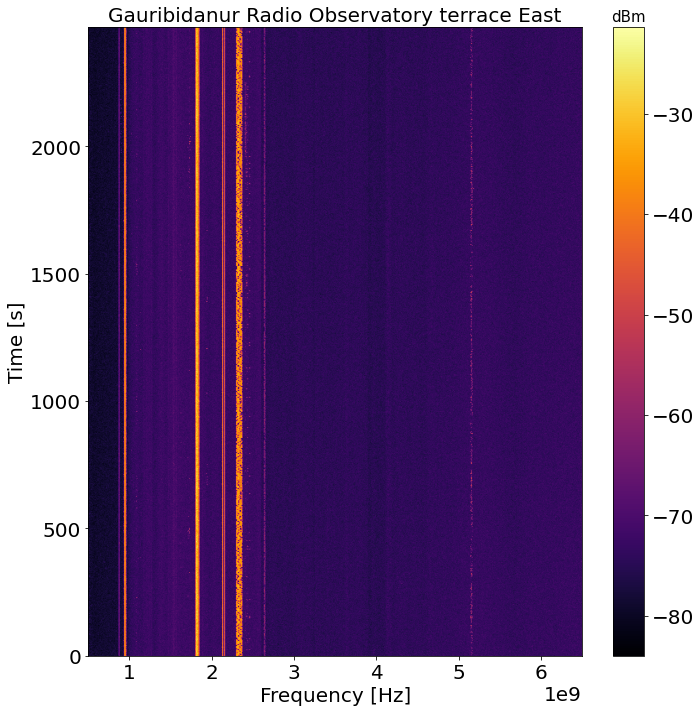

In [162]:
plt.title('Gauribidanur Radio Observatory terrace East',size=20)
c = plt.imshow(data_file_terrace_east_230323,cmap ='inferno',extent=[freq.min(),freq.max(),time_array_terrace_east_230323_offset.min(),time_array_terrace_east_230323_offset.max()])
clb = plt.colorbar(c)
clb.ax.set_title('dBm',size=15)
plt.xlabel('Frequency [Hz]',size=20)
plt.ylabel('Time [s]',size=20)
plt.show()

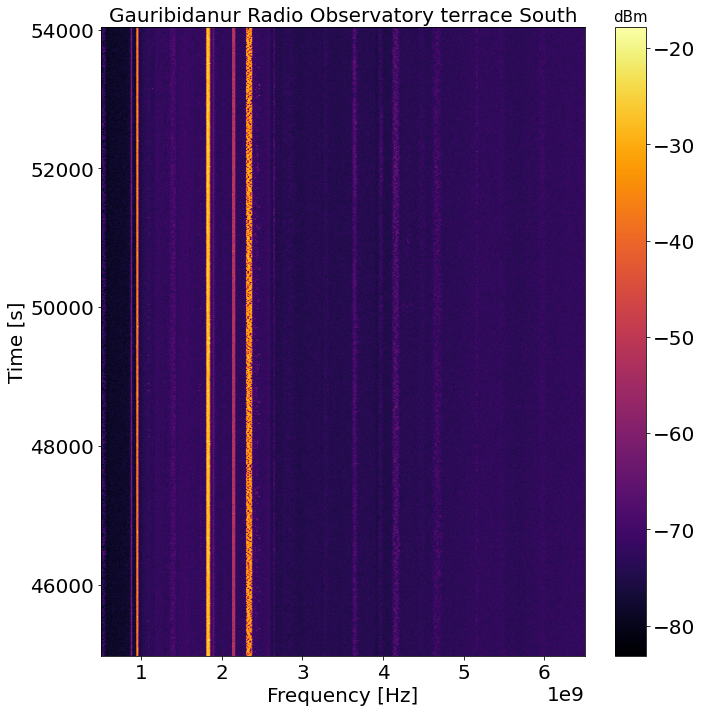

In [163]:
plt.title('Gauribidanur Radio Observatory terrace South',size=20)
c = plt.imshow(data_file_terrace_south_230323,cmap ='inferno',extent=[freq.min(),freq.max(),time_array.min(),time_array.max()])
clb = plt.colorbar(c)
clb.ax.set_title('dBm',size=15)
plt.xlabel('Frequency [Hz]',size=20)
plt.ylabel('Time [s]',size=20)
plt.show()

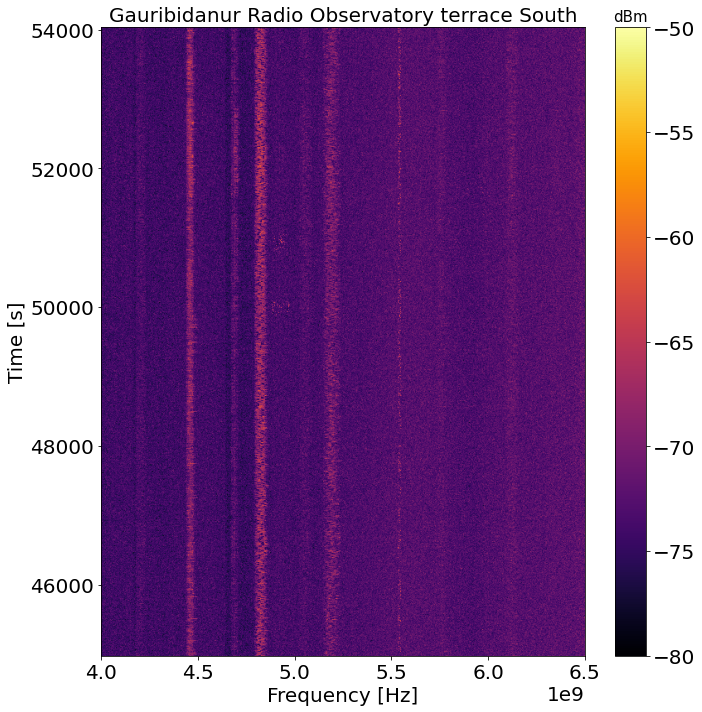

In [174]:
index_3GHz = freq_to_index(freq,3e9)
index_4GHz = freq_to_index(freq,4e9)
#np.shape(data_file_terrace_south_230323[:,index_3GHz:])
plt.title('Gauribidanur Radio Observatory terrace South',size=20)
c = plt.imshow(data_file_terrace_south_230323[:,index_3GHz:],vmax=-50,vmin=-80,cmap ='inferno',extent=[freq[index_4GHz],freq.max(),time_array.min(),time_array.max()])
clb = plt.colorbar(c)
clb.ax.set_title('dBm',size=15)
plt.xlabel('Frequency [Hz]',size=20)
plt.ylabel('Time [s]',size=20)
plt.show()

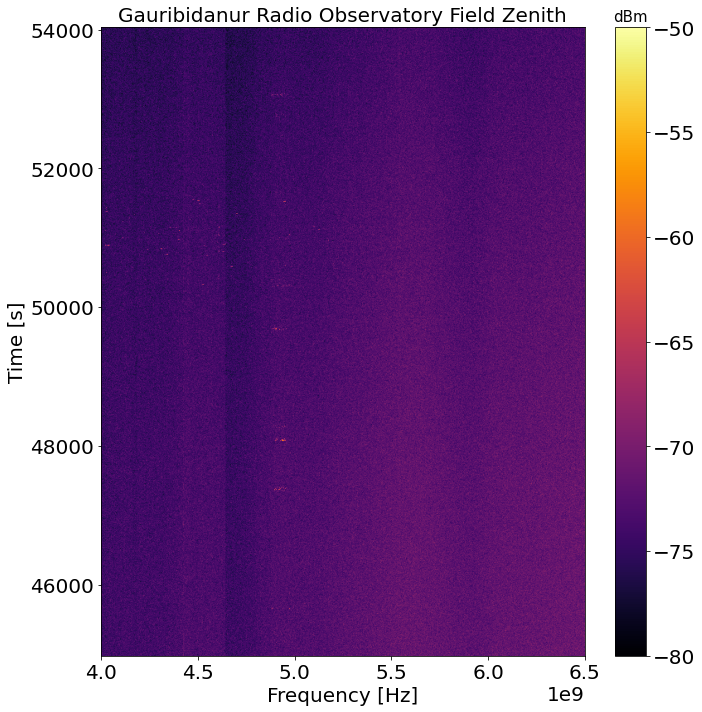

In [177]:
plt.title('Gauribidanur Radio Observatory Field Zenith',size=20)
c = plt.imshow(data_file_field_zenith_230323[:,index_3GHz:],vmax=-50,vmin=-80,cmap ='inferno',extent=[freq[index_4GHz],freq.max(),time_array.min(),time_array.max()])
clb = plt.colorbar(c)
clb.ax.set_title('dBm',size=15)
plt.xlabel('Frequency [Hz]',size=20)
plt.ylabel('Time [s]',size=20)
plt.show()

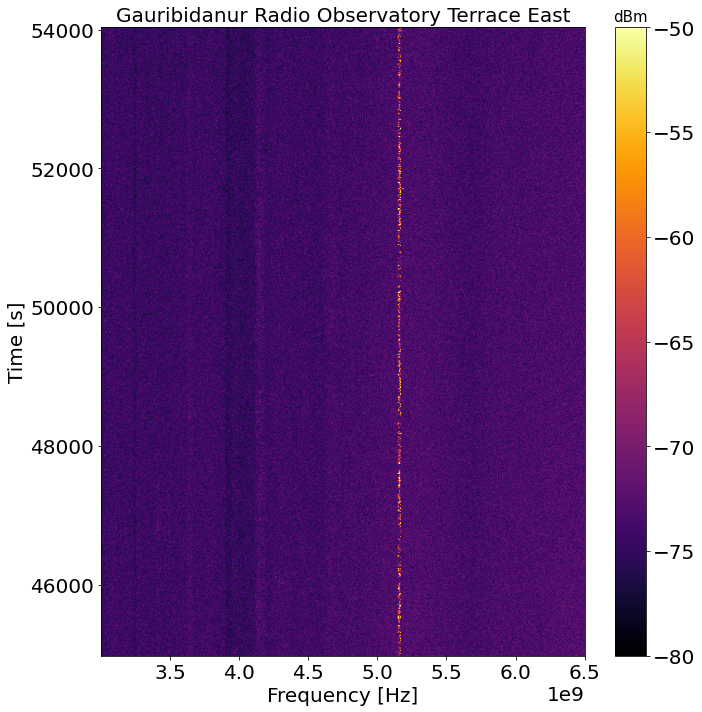

In [173]:

plt.title('Gauribidanur Radio Observatory Terrace East',size=20)
c = plt.imshow(data_file_terrace_east_230323[:,index_3GHz:],vmax=-50,vmin=-80,cmap ='inferno',extent=[freq[index_3GHz],freq.max(),time_array.min(),time_array.max()])
clb = plt.colorbar(c)
clb.ax.set_title('dBm',size=15)
plt.xlabel('Frequency [Hz]',size=20)
plt.ylabel('Time [s]',size=20)
plt.show()